# (Airline Performance Explanatory Analysis)
## by (Iman Hassan)

## Investigation Overview

> In this investigation,  I'm looking for to know the performance of each Airline , the main reasons of Arrival and Departure Delay and what are the top Airpots that has delay minutes.

## Dataset Overview

> The data set contian more than 14 million rows and more than 15 attributes and features that i will investigate on. Some of those features are Year, Month, DayofMonth, UniqueCarrier, DayofWeek, ArrDelay, DepDelay, orgin, Dest,and Cancelled. There is no data that has been take out but there is some additional attribute that added. 

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nbconvert

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
y_2007= pd.read_csv('2007.csv')
y_2008= pd.read_csv('2008.csv')
frames= [y_2007, y_2008]
df_all = pd.concat(frames)

In [4]:
# Change the column data of the weekdays names
df_all['DayOfWeek'].replace({1:'Mon',2:'Tues',3:'Wed',4:'Thur',5:'Fri',6:'Sat',7:'Sun'}, inplace= True)
# change the column data of the cancelled to yes and no
df_all['Cancelled'].replace({0:'No',1:'Yes'}, inplace= True)
# change the column data of the diverted to yes and no
df_all['Diverted'].replace({0:'No',1:'Yes'}, inplace= True)
# change the column data of the cancellation code to their meanning
df_all['CancellationCode'].replace({'A':'carrier','B':'weather','C':'NAS','D':'security'}, inplace= True)

In [5]:
df= df_all[['Year','Month','DayofMonth','DayOfWeek','UniqueCarrier','ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

In [6]:
df['ArrDelay_status']= pd.cut(df.ArrDelay, bins=[-500,0,15,60,1000], labels=['Early arrive','slightly delayed','delayed','highly delayed'])
df['DepDelay_status']= pd.cut(df.DepDelay, bins=[-500,0,15,60,1000], labels=['Early Departure','slightly delayed','delayed','highly delayed'])


In [7]:
most_5_origin_1= df.query('Origin == "ATL"')
most_5_origin_2= df.query('Origin == "ORD"')
most_5_origin_3= df.query('Origin == "DFW"')
most_5_origin_4= df.query('Origin == "DEN"')
most_5_origin_5= df.query('Origin == "LAX"')

frames= [most_5_origin_1, most_5_origin_2,most_5_origin_3,most_5_origin_4,most_5_origin_5]
most_5_origin = pd.concat(frames)

In [8]:
most_5_dest_1= df.query('Dest == "ATL"')
most_5_dest_2= df.query('Dest == "ORD"')
most_5_dest_3= df.query('Dest == "DFW"')
most_5_dest_4= df.query('Dest == "DEN"')
most_5_dest_5= df.query('Dest == "LAX"')

frames_D= [most_5_dest_1, most_5_dest_2,most_5_dest_3,most_5_dest_4,most_5_dest_5]
most_5_dest = pd.concat(frames_D)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Top 5 Origin Airports)

> ATL: Hartsfield Jackson Atlanta International Airport is the highest airport origin for all the data with more than 800K flights over the two years, followed by ORD: Chicago O'Hare International Airport.

Text(0.5, 0, 'Origin')

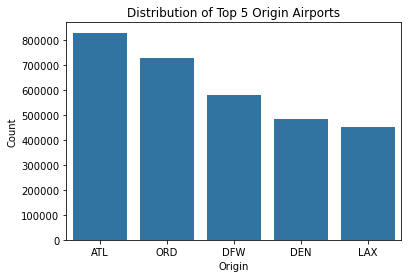

In [10]:
base_color = sb.color_palette()[0]
Counts_Origin= most_5_origin['Origin'].value_counts()
freq_origin= Counts_Origin.index
sb.countplot( data= most_5_origin, x= 'Origin', color=base_color, order= freq_origin)

plt.title('Distribution of Top 5 Origin Airports')
plt.ylabel('Count')
plt.xlabel('Origin')

## (Order of the Carrier operator)

> looking through the count of each Airline over the 2 years we can see that the highest airline operator is WN: Southwest Airlines followed by AA: American Airlines but the differance is more than million.

Text(0, 0.5, 'Unique carrier')

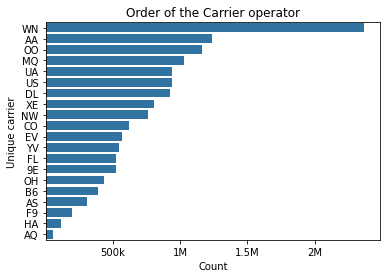

In [12]:
Counts_Carrier= df['UniqueCarrier'].value_counts()
freq_carr= Counts_Carrier.index
sb.countplot( data= df, y= 'UniqueCarrier', color=base_color, order= freq_carr);
plt.xticks([0.5e6, 1.0e6, 1.5e6, 2.0e6], [ '500k', '1M', '1.5M', '2M']);
plt.title('Order of the Carrier operator')

plt.xlabel('Count')
plt.ylabel('Unique carrier')


## (Distribution of Arrival Delay)

> Arrival delay takes more skweed to right shape. the data plottted on a logarithmic scale, that majorty of data are late by around 30 minutes.

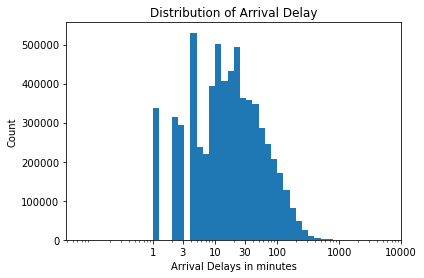

In [14]:
bins = 10 ** np.arange(-1, 7+0.1, 0.1)
ticks= [1, 3,10, 30, 100,1000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data= df , x= 'ArrDelay', bins=bins);
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Arrival Delays in minutes')
plt.title('Distribution of Arrival Delay')
plt.xlim([0,10000]);
plt.xticks(ticks, labels);

## (Reason of Cancellation)

> Carrier and Weather are the highest reason of delay followed by the National Airspace System (NAS) which contian non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. note:That is only repersent the cancellated flights which has less number of rows.. 

Text(0.5, 1.0, 'Reason of Cancellation')

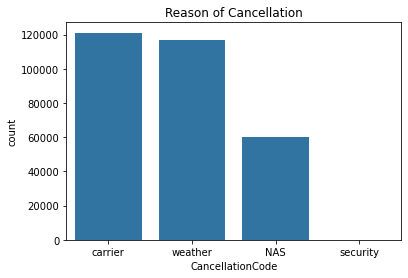

In [16]:
order_cancel=df['CancellationCode'].value_counts().index
sb.countplot(data=df, x='CancellationCode', color=base_color);
plt.title('Reason of Cancellation')

## (Distribution of Carrier Delay)

> Carrier delys takes a bill shape distribuation after taking log tranformation. the 20 minutes are the peak of the data with the hights number of flights. 

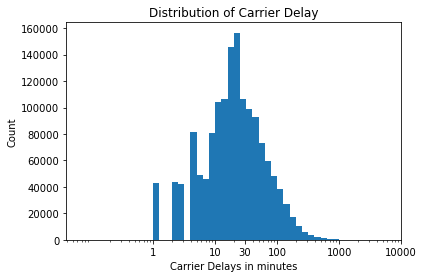

In [18]:
bins = 10 ** np.arange(-1, 7+0.1, 0.1)
ticks= [1, 10, 100,30, 1000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data= df , x= 'CarrierDelay', range=[-100,300], bins=bins);
#plt.yticks([0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6], [ '200k', '400k', '600K', '800K', '1M']);
plt.ylabel('Count')
plt.xlabel('Carrier Delays in minutes')
plt.title('Distribution of Carrier Delay')
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim([0,10000]);

## (Arrival Delay Vs. Departure Delay)

> there is a postive stronge relationship between arrival delay and departure delay. The liner reationship seems to be more stronger when the delay of both attributes are above 500 minutes.

Text(0.5, 1.0, 'Arrival Delay Vs. Departure Delay')

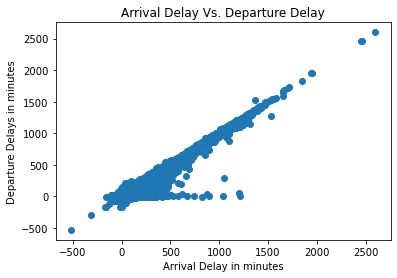

In [21]:
plt.scatter(data=df, x='ArrDelay',y='DepDelay');
plt.xlabel('Arrival Delay in minutes')
plt.ylabel('Departure Delays in minutes')
plt.title('Arrival Delay Vs. Departure Delay')

## (Year Vs. Departure Delay)

> As we care about the delay only so the chart represent the Departure delay which is higher than 15 minutes. the 2 years are almost have the same range between 15 and 70 minutes of delay with median is around 40 minutes.

Text(0.5, 1.0, 'Year Vs. Departure Delay')

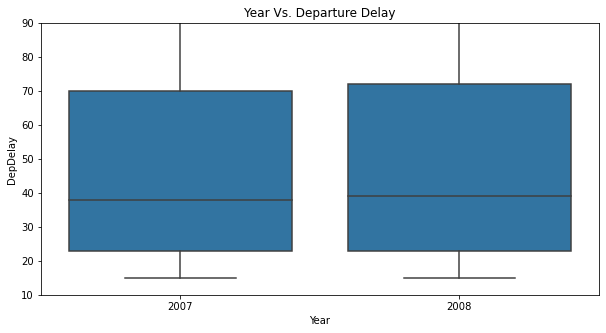

In [22]:
plt.figure(figsize = [10, 5])
deplay_15= df.query('DepDelay >= 15')
sb.boxplot(data=deplay_15, x='Year',y='DepDelay', color= base_color);
plt.ylim([10,90])
plt.title('Year Vs. Departure Delay')

## (Carrier Operators Vs. Carrier Delay)

> 9E: Pinnacle Airlines having the highest range and median of carrier delay that exceed 15 minutes. It median reach above 40 minutes delay.

Text(0.5, 1.0, 'Airline Operator Vs. Carrier Delay')

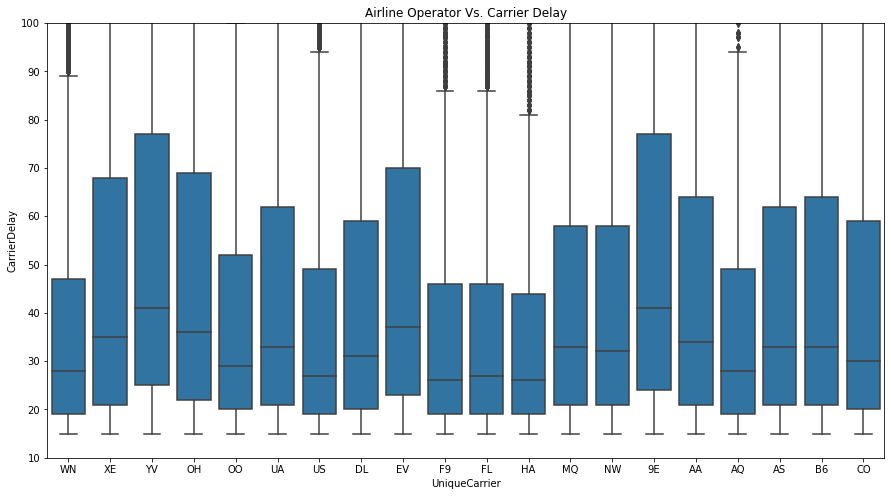

In [45]:
Carr_dely_15= df.query('CarrierDelay >= 15')
plt.figure(figsize = [15, 8])
sb.boxplot(data=Carr_dely_15, x='UniqueCarrier', y='CarrierDelay',  color=base_color);
plt.ylim([10,100]) 
plt.title('Airline Operator Vs. Carrier Delay')

## (Airport Origin Vs. Arrival Delay exceed 15 minutes)

> the Arrival delay vary based on the Flights origin. As the delay of origin of flights affect the Arrival delay we can see that among the top 5 airports origin Chicago airport has the hightest Arrival delay with median around 45 minutes. note: that delay is oly for the flights that exceed 15 minutes already.

Text(0.5, 1.0, 'Airport Origin Vs. Arrival Delay exceed 15 minutes')

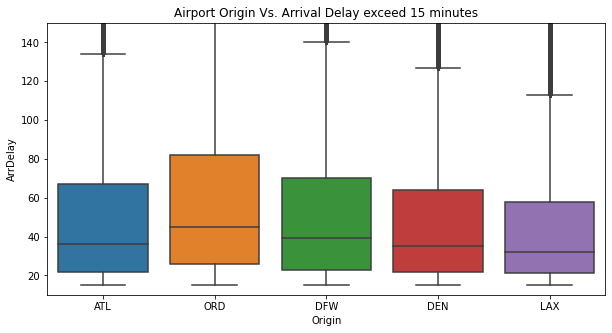

In [27]:
plt.figure(figsize = [10, 5])
a=most_5_origin.query('ArrDelay >= 15')
sb.boxplot(data=a, x='Origin',y='ArrDelay');
plt.ylim([10,150])
plt.title('Airport Origin Vs. Arrival Delay exceed 15 minutes')

## ( Carrier Delay by Airline operator and year)

> In 2008 the Carrier Delay minutes reach more than 2007. That indicate that delay within the control of the air carrier. In addition, we can see that HA: Hawaiian Airlines that has the highest minutes of delay within their control reach to 33 minutes followed by YV: Mesa Airlines and then EV: Atlantic Southeast Airlines

Text(0.5, 1.0, 'Carrier Delay by Airline operator and year')

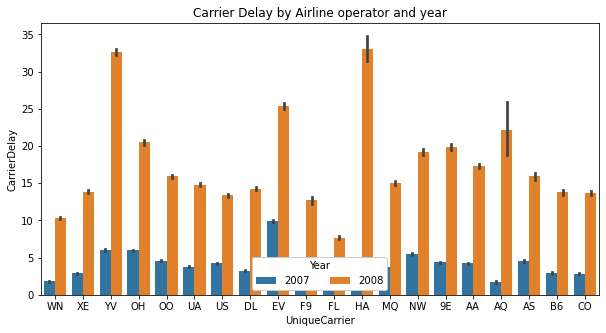

In [47]:
plt.figure(figsize = [10, 5])
ax = sb.barplot(data = df, x = 'UniqueCarrier', y = 'CarrierDelay', hue = 'Year');
ax.legend(loc = 8, ncol = 2, framealpha = 2, title = 'Year')
plt.title('Carrier Delay by Airline operator and year')

## ( Carrier Delay by Airline operator and Month)

> As 2008 has the highest carrier delay, Hawaiian Airlines has the highest delay in 2008 specially at Feb, March, Sep, and Nov. in addition, the months has lower range but higher median compered to YV: Mesa Airlines that has high range at all months. August is the highest month of carrier delay caused by YV: Mesa Airlines. Jan, Aug, and Sep are the highest in EV:Atlantic Southeast Airlines. AQ: Aloha Airlines has delays only in Jan and Feb but with high median.

(-15.0, 50.0)

<Figure size 1080x504 with 0 Axes>

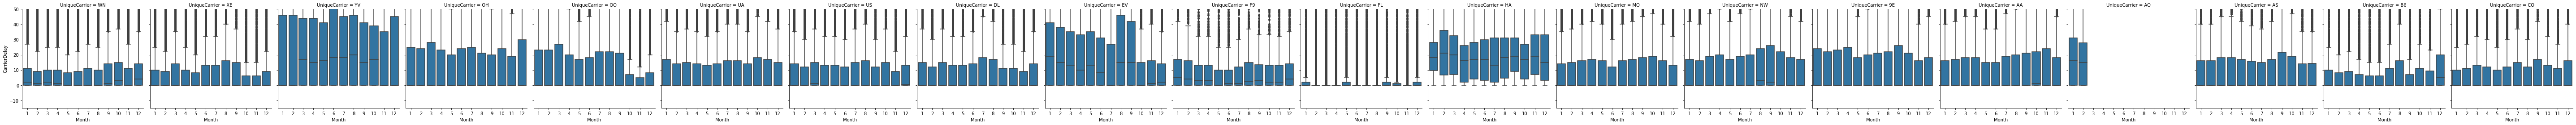

In [49]:
plt.figure(figsize = [15, 7])
dely_2008= df.query('Year == 2008')
s = sb.FacetGrid(data = dely_2008, col = 'UniqueCarrier', size = 4 )
s.map(sb.boxplot, 'Month', 'CarrierDelay')
plt.ylim([-15,50]) 

## ( Late Aircraft Delay by Origin Airport and Day of the week)

> The day of week has vary late Aircraft delay minutes over the origin airport. Monday at ORD: Chicago O'Hare International Airport has the highest delays due to the late arrival of the same aircraft at a previous airport. saturday has the lowest delay that caused of the lowest number of flights that happen in that day while Monday, Friday and Thuresday are the highest. Although ATL: Atlanta International Airport has the highest number of flights but the delays that comes from airports are happend more in Chicago Airport over all other airports.

Text(0.5, 1.0, 'Day of the Week, Origin and Late Aircraft Delay in minutes')

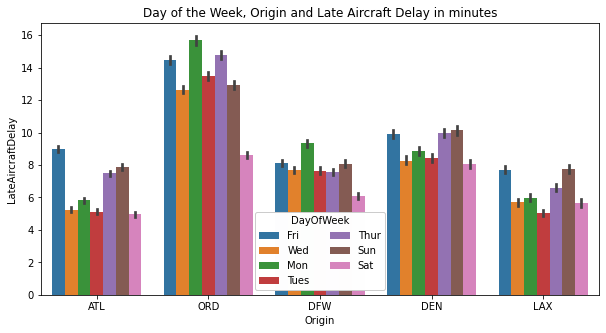

In [50]:
plt.figure(figsize = [10, 5])
ax = sb.barplot(data = most_5_origin, hue = 'DayOfWeek', y = 'LateAircraftDelay', x = 'Origin')
ax.legend(loc = 8, ncol = 2, framealpha = 2, title = 'DayOfWeek')
plt.title('Late Aircraft Delay by Origin Airport and Day of the week') 

The system cannot find the file specified.
